In [75]:
import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.decomposition import PCA
np.random.seed(0)


# Load file
file_name = 'CMP_Data.mat'
mat_contents = sio.loadmat(file_name)
p = mat_contents["Data1"]
sio.savemat(file_name, {'Data1': p})

# check if nan entries and delete if so
if np.sum(np.isnan(p)) > 0:
    p = p[~np.isnan(p)]

# Check size of array
print(np.shape(p), '\n')



(364, 26) 



In [76]:
# Prepare variables and targets
x = p[:, 20:22]  # usage of table columns 18-20
y = p[:, 25]  # MRR
# x2 = p[:, 20:22] # Columnns 21-23
print(x.shape, y.shape)


(364, 2) (364,)


In [77]:
# Data normalization
for i in range(x.shape[1]):
    data_ = x[:, i]
    x[:, i] = (data_ - np.amin(data_)) / (np.amax(data_) - np.amin(data_))  # (data-min)/(max-min) to range[0 1]

pca = PCA(n_components=1)
pcs = pca.fit_transform(x)
x = pcs

const = np.ones((len(x), 1))  # constant column
x = np.concatenate((x, const), axis=1)  # group normalized input columes and constant colume together
print(x.shape)

(364, 2)


In [78]:
# split training and testing data subsets
# shuffle index, so that the training scenarios and testing scenarios are the same
# 70% training and 30% testing
index = np.arange(len(x))
np.random.shuffle(index)
breakpoint = int(np.floor(0.7 * len(index)))  # np.ceil
print(breakpoint)

X_Train = x[index[0:breakpoint], :]
Y_Train = y[index[0:breakpoint]]
X_Test = x[index[breakpoint:], :]
Y_Test = y[index[breakpoint:]]
print(X_Train.shape, X_Test.shape, Y_Train.shape, Y_Test.shape)

254
(254, 2) (110, 2) (254,) (110,)


In [79]:
# cost function
def cost_function(x, y, B):  # B are the coefficients in MR
    J = np.sum((x.dot(B) - y) ** 2) / (2 * len(x))
    return J

In [80]:
# gradient descent
def gradient_descent(x, y, B, alpha, Iterations):  # alpha: learning rate

    loss_history = np.zeros(Iterations)

    for i in range(Iterations):
        gradient = x.T.dot(x.dot(B) - y) / len(x)
        B = B - alpha * gradient
        loss = cost_function(x, y, B)
        loss_history[i] = loss

    return B, loss_history

(2,)


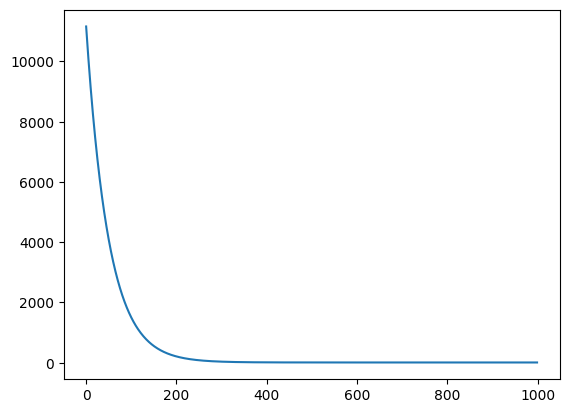

In [81]:
# training
B = np.random.random(X_Train.shape[1])
alpha = 0.01  # try 0.1,0.01
Iterations = 1000
newB, loss_history = gradient_descent(X_Train, Y_Train, B, alpha, Iterations)
plt.plot(np.arange(Iterations), loss_history)
print(newB.shape)

4.135347054694111
-0.013449540208077648 




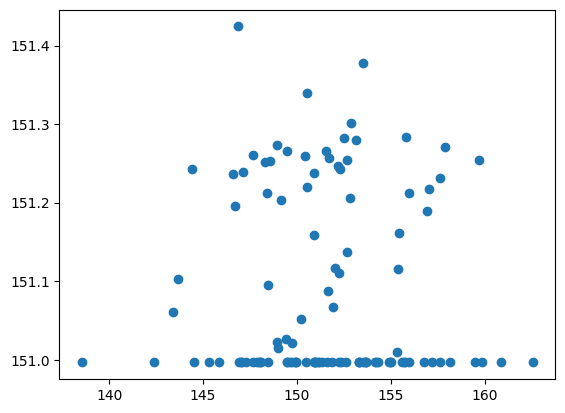

In [82]:
# testing
Y_predicted = X_Test.dot(newB)
plt.figure(2)
plt.scatter(Y_Test, Y_predicted)


# performance evaluation, for regression problems, we need R2 and RMSE


def RMSE(y, Y_pred):
    RMSE = np.sqrt(np.mean((y - Y_pred) ** 2))
    return RMSE


def R2(y, Y_pred):
    sst = np.sum((y - y.mean()) ** 2)
    ssr = np.sum((y - Y_pred) ** 2)
    R2 = 1 - (ssr / sst)
    return R2

print(RMSE(Y_Test, Y_predicted))
print(R2(Y_Test, Y_predicted), '\n\n')

4.131532326719705
-0.011580651762747696


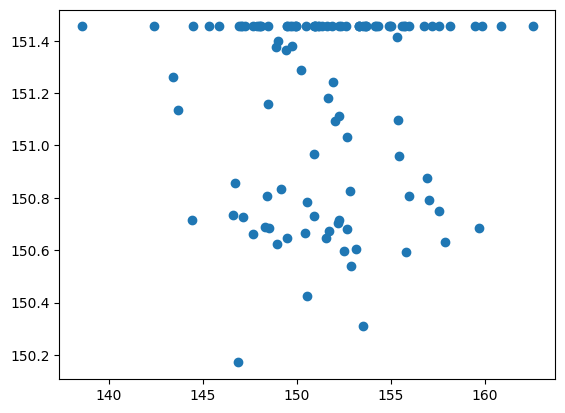

In [83]:
linear = linear_model.LinearRegression()  # create an object of multiple regression model
linear.fit(X_Train, Y_Train)  # training process
Y_predicted_1 = linear.predict(X_Test)
plt.scatter(Y_Test, Y_predicted_1)
print(RMSE(Y_Test, Y_predicted_1))
print(R2(Y_Test, Y_predicted_1))
